In [1]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import History
history = History()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Data Acquisition

In [2]:
# Data Acuisition
x_train=pd.read_csv("mnist_train.csv")
x_test=pd.read_csv("mnist_test.csv")

In [3]:
# Data Visulization
x_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Data Preprocessing

y_train = x_train.iloc[:,1].values
x_train = x_train.drop(["label"],axis=1)
y_test = x_test.iloc[:,1].values
x_test = x_test.drop(["label"],axis=1)

In [5]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [7]:
#adding some noise
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_val_noisy = x_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

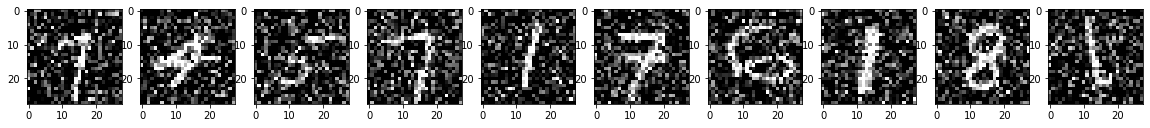

In [8]:
#Data Visualizaion
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train_noisy[i].reshape(28,28))
    plt.gray()
plt.savefig('denoisingmnist.png')
plt.show()

In [9]:
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')
print(f'x_val shape = {x_val.shape}')

x_train shape = (48000, 784)
x_test shape = (10000, 784)
x_val shape = (12000, 784)


# Model

In [10]:
autoencoder = Sequential()
autoencoder.add(Dense(128, input_dim=784, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid'))

In [11]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

# Fit Data

In [12]:
history = autoencoder.fit(x_train_noisy, x_train, epochs=150, batch_size = 256, shuffle = True,
              validation_data = (x_val_noisy,x_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 3s 65us/step - loss: 0.3310 - accuracy: 0.7553 - val_loss: 0.2869 - val_accuracy: 0.7933
Epoch 2/150
48000/48000 [==============================] - 3s 58us/step - loss: 0.2602 - accuracy: 0.7977 - val_loss: 0.2845 - val_accuracy: 0.7952
Epoch 3/150
48000/48000 [==============================] - 3s 59us/step - loss: 0.2551 - accuracy: 0.7980 - val_loss: 0.2760 - val_accuracy: 0.7938
Epoch 4/150
48000/48000 [==============================] - 3s 60us/step - loss: 0.2471 - accuracy: 0.7947 - val_loss: 0.2659 - val_accuracy: 0.7876
Epoch 5/150
48000/48000 [==============================] - 3s 62us/step - loss: 0.2425 - accuracy: 0.7941 - val_loss: 0.2593 - val_accuracy: 0.7869
Epoch 6/150
48000/48000 [==============================] - 3s 61us/step - loss: 0.2393 - accuracy: 0.7951 - val_loss: 0.2549 - val_accuracy: 0.7855
Epoch 7/150
48000/48000 [==============================] - 3s 

Epoch 56/150
48000/48000 [==============================] - 3s 65us/step - loss: 0.1337 - accuracy: 0.8086 - val_loss: 0.1553 - val_accuracy: 0.8010
Epoch 57/150
48000/48000 [==============================] - 3s 66us/step - loss: 0.1332 - accuracy: 0.8087 - val_loss: 0.1549 - val_accuracy: 0.7997
Epoch 58/150
48000/48000 [==============================] - 3s 64us/step - loss: 0.1327 - accuracy: 0.8087 - val_loss: 0.1617 - val_accuracy: 0.7981
Epoch 59/150
48000/48000 [==============================] - 3s 63us/step - loss: 0.1324 - accuracy: 0.8088 - val_loss: 0.1489 - val_accuracy: 0.8025
Epoch 60/150
48000/48000 [==============================] - 3s 64us/step - loss: 0.1319 - accuracy: 0.8088 - val_loss: 0.1536 - val_accuracy: 0.8018
Epoch 61/150
48000/48000 [==============================] - 3s 72us/step - loss: 0.1314 - accuracy: 0.8090 - val_loss: 0.1527 - val_accuracy: 0.8012
Epoch 62/150
48000/48000 [==============================] - 3s 70us/step - loss: 0.1311 - accuracy: 0.8090

48000/48000 [==============================] - 3s 72us/step - loss: 0.1185 - accuracy: 0.8109 - val_loss: 0.1399 - val_accuracy: 0.8061
Epoch 111/150
48000/48000 [==============================] - 3s 67us/step - loss: 0.1183 - accuracy: 0.8109 - val_loss: 0.1449 - val_accuracy: 0.8051
Epoch 112/150
48000/48000 [==============================] - 3s 69us/step - loss: 0.1182 - accuracy: 0.8109 - val_loss: 0.1430 - val_accuracy: 0.8066
Epoch 113/150
48000/48000 [==============================] - 3s 67us/step - loss: 0.1179 - accuracy: 0.8110 - val_loss: 0.1376 - val_accuracy: 0.8078
Epoch 114/150
48000/48000 [==============================] - 3s 68us/step - loss: 0.1178 - accuracy: 0.8110 - val_loss: 0.1451 - val_accuracy: 0.8060
Epoch 115/150
48000/48000 [==============================] - 3s 68us/step - loss: 0.1177 - accuracy: 0.8110 - val_loss: 0.1416 - val_accuracy: 0.8062
Epoch 116/150
48000/48000 [==============================] - 4s 74us/step - loss: 0.1176 - accuracy: 0.8110 - val_

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


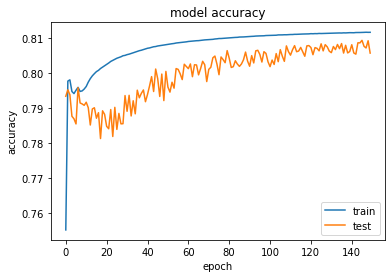

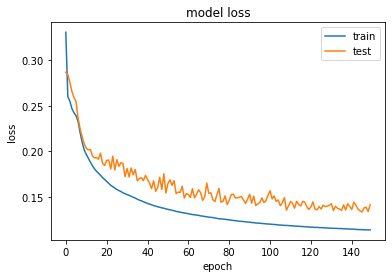

In [13]:
# Plot training loss and validation split loss over the epochs

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('denoisingae_model_accuracy.png')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('denoisingae_model_loss.png')
plt.show()

In [14]:
reconstructed_imgs = autoencoder.predict(x_test_noisy)

In [15]:
evaluation = autoencoder.evaluate(x_test_noisy, x_test)

print("Loss:",evaluation[0])
print("Accuracy",evaluation[1]*100)

10000/10000 [==============================] - 0s 47us/step
Loss: 0.11697267587184906
Accuracy 80.83341717720032


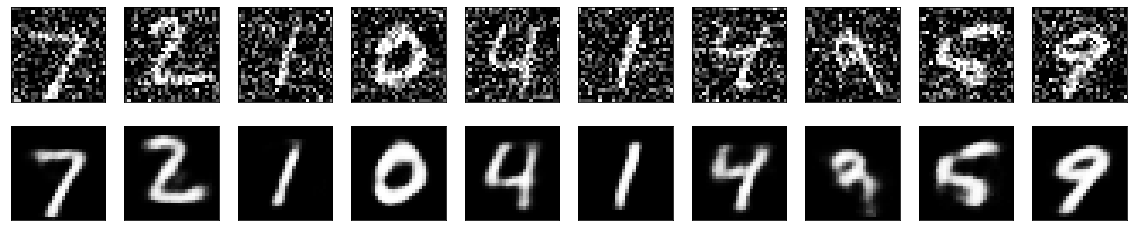

In [16]:
# Ploting the original input vs reconstructed output
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(reconstructed_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('Denoisingae_model_output.png')
plt.show()